In [38]:
#Loading dependencies:
from sklearn import datasets
from sklearn import svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

In [39]:
#Loading data:
data = pd.read_csv("baking_recipies.csv")
3data.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


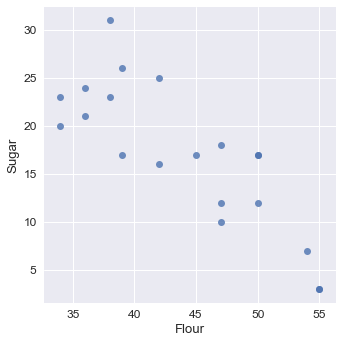

In [51]:
#Select features from the data:
sns.lmplot('Flour','Sugar', data = data,fit_reg = False);

In [56]:
#Slice the data and create labels array:
sugar_flour = data[["Sugar","Flour"]].as_matrix()
type_labels = np.where(data["Type"]=="Muffin",0,1)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [57]:
#Fit the model:
model = svm.SVC(kernel = "linear")
model.fit(sugar_flour,type_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
#Visualization:

#Create separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5,30)
yy = a * xx - (model.intercept_[0]) / w[1]

#Plot parallel hyperplanes
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a*b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a*b[0])

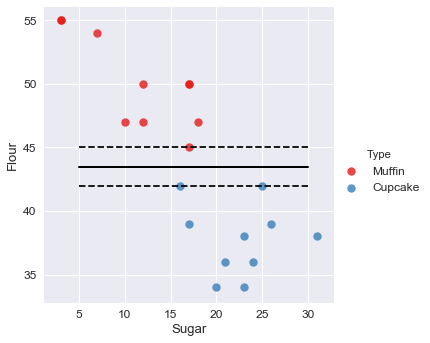

In [80]:
#Margins and support vectors:
sns.lmplot("Sugar", "Flour", data = recipies, hue = "Type", palette = "Set1", fit_reg = False, scatter_kws = {"s":70})
plt.plot(xx, yy, linewidth = 2, color = "black")     #hyperplane
plt.plot(xx, yy_down, "k--")  #parallel plane 1
plt.plot(xx, yy_up, "k--")    #parallel plane 2